### Graph2

In [ ]:
from typing import TypedDict, List
from langgraph.graph import StateGraph

class AgentState(TypedDict):  # 状态字典
    values:List[int]
    name:str
    result:str


In [21]:
def process_values(state: AgentState) -> AgentState:
    """ 处理多个输入的值 """
    state["result"] = f"hello,{state["name"]}!,your sum is {sum(state["values"])}"
    return state

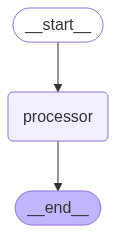

In [22]:
graph = StateGraph(AgentState)
graph.add_node("processor", process_values)  # 添加结点
graph.set_entry_point("processor")  # 设置起始结点
graph.set_finish_point("processor")  # 设置结束结点
app = graph.compile()  # 编译图
app

In [25]:
res = app.invoke({"values":[1,2,3,4], "name":"Bob"})  # 调用图，传入初始状态
res

{'values': [1, 2, 3, 4], 'name': 'Bob', 'result': 'hello,Bob!,your sum is 10'}

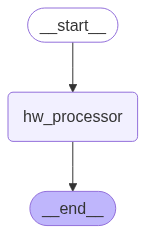

In [30]:
class HW_State(TypedDict):
    values: List[int]
    name: str
    operation: str
    result: str

def process_hw(state: HW_State) -> HW_State:
    """ 处理多个输入的值 """
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is {sum(state['values'])}"
    elif state["operation"] == "*":
        res = 1
        for value in state["values"]:
            res *= value
        state["result"] = f"Hi {state['name']}, your answer is {res}"
    else:
        state["result"] = "Invalid operation"
    return state

graph_hw = StateGraph(HW_State)
graph_hw.add_node("hw_processor", process_hw)  # 添加结点
graph_hw.set_entry_point("hw_processor")  # 设置起始结点
graph_hw.set_finish_point("hw_processor")  # 设置结束结点
app_hw = graph_hw.compile()  # 编译图
app_hw

In [31]:
result_hw = app_hw.invoke({"values": [1, 2, 3], "name": "Alice", "operation": "+"})  # 调用图，传入初始状态
result_hw["result"]  # 返回结果

'Hi Alice, your answer is 6'

In [33]:
result_hw = app_hw.invoke({"values": [1, -2, 3,32], "name": "Bob", "operation": "*"})  # 调用图，传入初始状态
result_hw["result"]  # 返回结果

'Hi Bob, your answer is -192'